<a href="https://colab.research.google.com/github/eduardoluisvieira/mackenzie/blob/main/AnaliseIndustria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercício de análise da relação dos índices de inflação (IPCA), taxa de juros de longo prazo (TJLP), utilização da capacidade instalada (Indústria de Transformação) e taxa básica de juros (SELIC)**

---



In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
# Leitura do arquivo CSL armazenado no GitHub
indicadores = pd.read_csv('https://raw.githubusercontent.com/eduardoluisvieira/mackenzie/main/Bacen020322.csv',sep = ';',decimal = '.',encoding='latin1')

In [37]:
indicadores.head()

,Date,256 - Long term interest rate (TJLP) - % p.y.,433 - Broad National Consumer Price Index (IPCA) - Monthly % var.,4189 - Interest rate - Selic accumulated in the month in annual terms (basis 252) - % p.y.,4380 - GDP monthly - current prices (R$ million) - R$ (million),24352 - Capacity utilization  manufacturing industry (FGV) - %
0,01/2012,6.00,0.56,10.70,"364,190.6",80.60
1,02/2012,6.00,0.45,10.40,"367,525.1",81.90
2,03/2012,6.00,0.21,9.82,"397,758.3",80.90
3,04/2012,6.00,0.64,9.35,"385,880.0",80.80
4,05/2012,6.00,0.36,8.87,"401,862.3",81.80


In [38]:
# Renomeando as colunas
indicadores.columns = ['Data','TJLP','IPCA','SELIC','PIB-Mensal','Util_Cap_Instalada']
indicadores

,Data,TJLP,IPCA,SELIC,PIB-Mensal,Util_Cap_Instalada
0,01/2012,6.00,0.56,10.70,"364,190.6",80.60
1,02/2012,6.00,0.45,10.40,"367,525.1",81.90
2,03/2012,6.00,0.21,9.82,"397,758.3",80.90
3,04/2012,6.00,0.64,9.35,"385,880.0",80.80
4,05/2012,6.00,0.36,8.87,"401,862.3",81.80
...,...,...,...,...,...,...
117,10/2021,5.32,1.25,6.30,"739,982.7",83.20
118,11/2021,5.32,0.95,7.65,"755,731.3",82.80
119,12/2021,5.32,0.73,8.76,"759,981.1",80.60
120,01/2022,6.08,0.54,9.15,"742,147.6",78.90


In [39]:
indicadores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Data                122 non-null    object
 1   TJLP                122 non-null    object
 2   IPCA                122 non-null    object
 3   SELIC               122 non-null    object
 4   PIB-Mensal          122 non-null    object
 5   Util_Cap_Instalada  122 non-null    object
dtypes: object(6)
memory usage: 5.8+ KB


In [40]:
#removendo a última linha que não faz parte dos dados a serem analisados
indicadores = indicadores.drop(121)

In [41]:
# Resumo estatístico
indicadores.describe()

,Data,TJLP,IPCA,SELIC,PIB-Mensal,Util_Cap_Instalada
count,121,121,121,121,121,121
unique,121,23,83,81,121,77
top,01/2012,5.00,0.25,6.40,"364,190.6",77.30
freq,1,24,4,16,1,4


In [51]:
# Convertendo os tipos de dados de objeto para numérico
indicadores['TJLP'] = pd.to_numeric(indicadores['TJLP'])
indicadores['IPCA'] = pd.to_numeric(indicadores['IPCA'])
indicadores['SELIC'] = pd.to_numeric(indicadores['SELIC'])
indicadores['Util_Cap_Instalada'] = pd.to_numeric(indicadores['Util_Cap_Instalada'])


In [52]:
# Reconhecimento dos tipos de dados corretos e publicação das estatísticas básicas
indicadores.describe()

,TJLP,IPCA,SELIC,Util_Cap_Instalada
count,121.000000,121.000000,121.000000,121.000000
mean,5.923554,0.491157,8.477769,77.420661
std,0.987574,0.357538,3.692207,4.434954
min,4.390000,-0.380000,1.900000,56.500000
25%,5.000000,0.250000,6.400000,74.800000
50%,5.950000,0.440000,8.010000,76.800000
75%,6.980000,0.730000,11.150000,81.100000
max,7.500000,1.350000,14.150000,85.100000


In [54]:
Top10SELIC = indicadores.nlargest(10,'Util_Cap_Instalada')
Top10SELIC

,Data,TJLP,IPCA,SELIC,PIB-Mensal,Util_Cap_Instalada
22,11/2013,5.00,0.54,9.45,"470,324.6",85.1
21,10/2013,5.00,0.57,9.25,"475,713.6",84.2
11,12/2012,5.50,0.79,7.16,"413,705.5",84.1
9,10/2012,5.50,0.59,7.23,"431,405.6",84.0
10,11/2012,5.50,0.60,7.14,"426,600.5",84.0
23,12/2013,5.00,0.92,9.90,"467,252.3",84.0
117,10/2021,5.32,1.25,6.30,"739,982.7",83.2
20,09/2013,5.00,0.35,8.90,"447,754.9",83.1
7,08/2012,5.50,0.41,7.85,"418,752.0",83.0
8,09/2012,5.50,0.57,7.39,"402,675.8",83.0


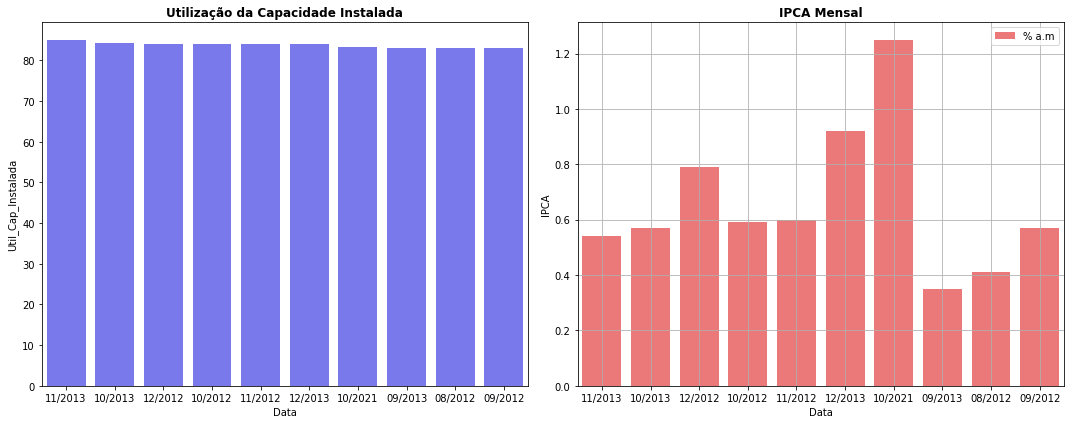

In [60]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=Top10SELIC['Data'],y=Top10SELIC['Util_Cap_Instalada'], color='b',label='(%)',alpha=0.6)
plt.title('Utilização da Capacidade Instalada',fontsize=12,weight='bold')

plt.subplot(1,2,2)
sns.barplot(x=Top10SELIC['Data'],y=Top10SELIC['IPCA'], color='r',label='% a.m',alpha=0.6)
plt.title('IPCA Mensal',fontsize=12,weight='bold')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [63]:
# Cenário que a taxa SELIC superou os 10%
SELIC_10 = indicadores[indicadores.SELIC > 10.0][['Data','SELIC','IPCA','Util_Cap_Instalada']]
SELIC_10.sort_values(by=['SELIC'],ascending=False)

,Data,SELIC,IPCA,Util_Cap_Instalada
44,09/2015,14.15,0.54,75.7
51,04/2016,14.15,0.61,73.2
45,10/2015,14.15,0.82,76.5
46,11/2015,14.15,1.01,76.8
47,12/2015,14.15,0.96,76.4
48,01/2016,14.15,1.27,72.4
49,02/2016,14.15,0.90,73.5
50,03/2016,14.15,0.43,72.6
52,05/2016,14.15,0.78,73.1
53,06/2016,14.15,0.35,73.4


In [65]:
len(SELIC_10)


45

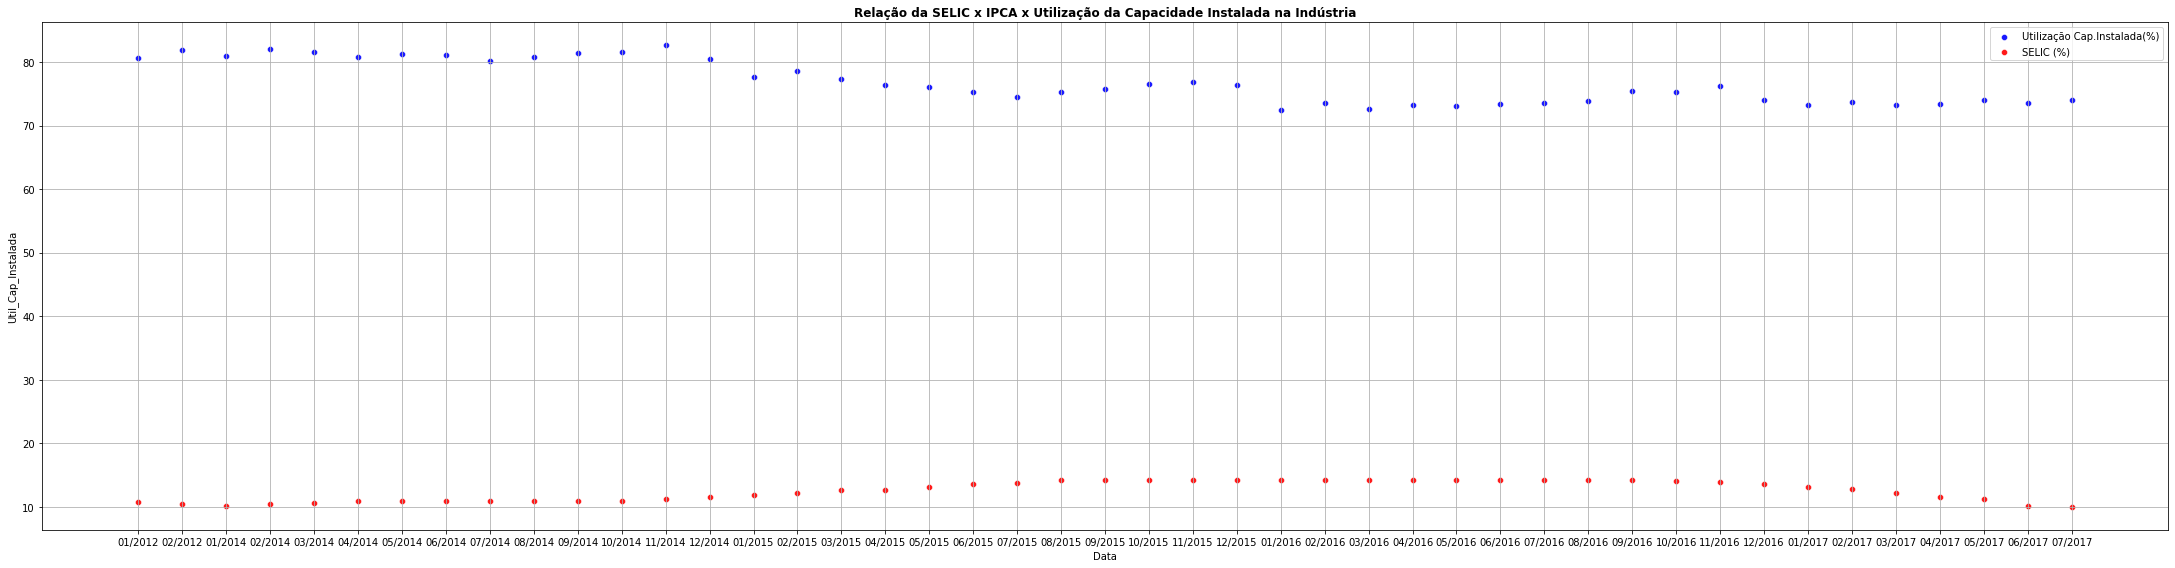

In [71]:
plt.figure(figsize=(60,8))
plt.subplot(1,2,1)
sns.scatterplot(x=SELIC_10['Data'],y=SELIC_10['Util_Cap_Instalada'], color='b',label='Utilização Cap.Instalada(%)',alpha=0.9)
sns.scatterplot(x=SELIC_10['Data'],y=SELIC_10['SELIC'], color='r',label='SELIC (%)',alpha=0.9)
#sns.scatterplot(x=SELIC_10['Data'],y=SELIC_10['IPCA'], color='g',label='IPCA',alpha=0.9)
plt.title('Relação da SELIC x IPCA x Utilização da Capacidade Instalada na Indústria',fontsize=12,weight='bold')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()